# Classifying Heart Disease

In this project we're using a machine learning model of logistic regression. We'll also be looking at a real-life dataset: the [Heart Disease Data Set](https://archive.ics.uci.edu/dataset/45/heart+disease) from the UCI Machine Learning Repository, created by the famous Cleveland Clinic Foundation. Note: The dataset has been partially cleaned to perform binary classification, the thing we're focusing on.

In [7]:
# Import common libraries (relevant ones 
# for ML are imported later on):
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [5]:
# Read the dataset:
heart = pd.read_csv('heart_disease.csv')

## Exploring the Dataset

In [6]:
heart.head()

,Unnamed: 0,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,present
0,1,63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0
1,2,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,1
2,3,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
3,4,37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0
4,5,41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,0


In [3]:
heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  303 non-null    int64  
 1   age         303 non-null    int64  
 2   sex         303 non-null    int64  
 3   cp          303 non-null    int64  
 4   trestbps    303 non-null    int64  
 5   chol        303 non-null    int64  
 6   fbs         303 non-null    int64  
 7   restecg     303 non-null    int64  
 8   thalach     303 non-null    int64  
 9   exang       303 non-null    int64  
 10  oldpeak     303 non-null    float64
 11  slope       303 non-null    int64  
 12  ca          303 non-null    object 
 13  thal        303 non-null    object 
 14  present     303 non-null    int64  
dtypes: float64(1), int64(12), object(2)
memory usage: 35.6+ KB


Columns `ca` and `thal` have  `object` dtypes; different than any other else. We need to convert this first into `int`/`float`:

In [19]:
heart['ca'].value_counts(normalize=True)

0.0    0.580858
1.0    0.214521
2.0    0.125413
3.0    0.066007
?      0.013201
Name: ca, dtype: float64

In [20]:
heart['thal'].value_counts(normalize=True)

3.0    0.547855
7.0    0.386139
6.0    0.059406
?      0.006601
Name: thal, dtype: float64

These columns have a value of `?`, and we need to figure out how to deal with it. The description tells us that:

* `ca` : number of major vessels (0-3) colored by flourosopy,
* `thal` : <no info> \*browsing\* thalassemia, binary (0-1)
    
Since we can't do much about it and the portion's small compared to other values, we'll change the `?` to `0`:

In [23]:
heart[ heart['ca'] == '?' ] = 0.0
heart[ heart['thal'] == '?' ] = 0.0

heart['ca'] = pd.to_numeric(heart['ca'])
heart['thal'] = pd.to_numeric(heart['thal'])

In [24]:
heart.describe()

,Unnamed: 0,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,present
count,303.000000,303.000000,303.000000,303.00000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,147.689769,53.462046,0.663366,3.09571,129.085809,242.452145,0.141914,0.976898,146.636964,0.320132,1.034653,1.570957,0.663366,4.636964,0.452145
std,88.971735,11.755978,0.473340,1.05200,25.436049,61.979837,0.349539,0.994752,30.849456,0.467299,1.163840,0.651601,0.934375,2.029636,0.498528
min,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,70.500000,47.000000,0.000000,2.00000,120.000000,209.500000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
50%,147.000000,55.000000,1.000000,3.00000,130.000000,240.000000,0.000000,0.000000,152.000000,0.000000,0.800000,2.000000,0.000000,3.000000,0.000000
75%,224.500000,61.000000,1.000000,4.00000,140.000000,275.000000,0.000000,2.000000,165.000000,1.000000,1.600000,2.000000,1.000000,7.000000,1.000000
max,302.000000,77.000000,1.000000,4.00000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000,7.000000,1.000000


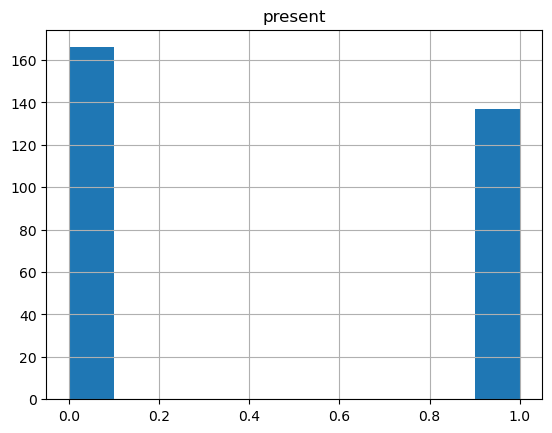

In [25]:
heart.hist('present')
plt.show()

In [26]:
# Checking potential predictors:
heart.groupby("present").agg( 
    { "age": "mean", "sex": "mean", "cp": "mean", "trestbps": "mean", 
     "chol": "mean", "fbs": "mean", "restecg": "mean", "thalach": "mean", 
     "exang": "mean", "oldpeak": "mean", "slope": "mean", "ca": "mean", "thal": "mean" 
    } 
)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
present,,,,,,,,,,,,,
0,50.740964,0.536145,2.692771,124.506024,234.692771,0.138554,0.813253,152.849398,0.138554,0.577108,1.361446,0.265060,3.650602
1,56.759124,0.817518,3.583942,134.635036,251.854015,0.145985,1.175182,139.109489,0.540146,1.589051,1.824818,1.145985,5.832117


### Insights

* No missing values; 303 across the board
* There are 15 columns: 7 numerical, 7 categorical, 1 label `present`.
* There's almost an equal number among patient with cases and non-cases
* Seeing the distribution, we can look for potential candidates with a far range between the cases and non-cases, including:
    * `age`
    * `thalach` (max heart rate achieved)
    * `restecg` (resting ECG)
    * `ca` (number of vessels colored by spectroscopy)

## Dividing the Data

To implement the machine learning model, we'll need:

* A training set to estimate the regression coefficients
* A test set to assess the predictive ability of the model

We have 303 columns--small number. We can divide it into `training:test = 70:30`

In [33]:
from sklearn.model_selection import train_test_split

X = heart[['age', 'thalach', 'restecg', 'ca']]
y = heart['present']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,
                                                   random_state=1)
# Checking samples representation:
print(f'`present` = (0,1) in Training Set: {sum(y_train == 0)}, {sum(y_train == 1)}')
print(f'`present` = (0,1) in Test Set: {sum(y_test == 0)}, {sum(y_test == 1)}')

`present` = (0,1) in Training Set: 116, 96
`present` = (0,1) in Test Set: 50, 41


Samples in both set seems representative; there are balanced values of `0` and `1`.

## Building the Model

Now we can start making the model and finding the 

In [36]:
model = LogisticRegression()
model.fit(X_train, y_train)
y_train_pred = model.predict(X_train)

accuracy = model.score(X_train, y_train)
tp = sum((y_train == 1) & (y_train_pred == 1))
fp = sum((y_train == 0) & (y_train_pred == 1))
tn = sum((y_train == 0) & (y_train_pred == 0))
fn = sum((y_train == 1) & (y_train_pred == 0))

sensitivity = tp / (tp + fn)
specificity = tn / (tn + fp)

ppv = tp / (tp + fp)
npv = tn / (tn + fn)

In [39]:
print(f'Training Accuracy: {round(accuracy * 100, 4)}%')
print(f'Training Sensitivity: {round(sensitivity * 100, 4)}%')
print(f'Training Specificity: {round(specificity * 100, 4)}%')

Training Accuracy: 74.0566%
Training Sensitivity: 61.4583%
Training Specificity: 84.4828%


From the evaluation above, we can see that the model seems to perform better on non-cases with `specificity` = 84.4828%

## Interpreting the Model Coefficients

Let's look at the coefficients to see if they make sense.`LogisticRegression()` relates the binary outcome to the linear combination of predictors via the link function:

$$log( EY / (1-EY) ) = b_0 + b_1 * X$$

Thsi function can result us in finding both coefficients:

$$log( O_1 / O_0 ) = b_1$$ $$ O_1 / O_0 = odds\_ratio = \exp(b_1) $$

In [42]:
coefs = ['age', 'thalach', 'restingecg', 'ca']

# Checking in terms of log-odds
for coef, val in zip(coefs, model.coef_[0]):
    print(coef, ":", round(val, 2))

age : 0.03
thalach : -0.02
restingecg : 0.3
ca : 1.01


In [43]:
# Checking in terms of odds-ratio
for coef, val in zip(coefs, model.coef_[0]):
    print(coef, ":", round(np.exp(val), 2))

age : 1.03
thalach : 0.98
restingecg : 1.35
ca : 2.76


When odds-ratio is more than 1, the model will be more likely to classify the column values to the label, in this case odds that the patient has heart disease.

* On the first hand, `age` and `thalach` is close to 1, that doesn't tell us much about the ratio. It could predict the labelling 50:50.
* On the other hand, `restingecg`  and `ca` have odds 1.35 and 2.76 respectively. This means that both columns have 47% and 176% increase in odds of heart disease.

## Final Model Evaluation

Now we can assess the predictive ability of our logistic regression model.

In [49]:
model_test = LogisticRegression()
model_test.fit(X_test, y_test)

y_test_pred = model.predict(X_test)
accuracy_test = model.score(X_test, y_test)

tp_test = sum((y_test == 1) & (y_test_pred == 1))
fp_test = sum((y_test == 0) & (y_test_pred == 1))
tn_test = sum((y_test == 0) & (y_test_pred == 0))
fn_test = sum((y_test == 1) & (y_test_pred == 0))

sensitivity_test = tp_test / (tp_test + fn_test)
specificity_test = tn_test / (tn_test + fp_test)

ppv_test = tp_test / (tp_test + fp_test)
npv_test = tn_test / (tn_test + fn_test)

In [50]:
print(f'Test Accuracy: {round(accuracy_test * 100, 4)}%')
print(f'Test Sensitivity: {round(sensitivity_test * 100, 4)}%')
print(f'Test Specificity: {round(specificity_test * 100, 4)}%')

Test Accuracy: 75.8242%
Test Sensitivity: 70.7317%
Test Specificity: 80.0%


# Conclusions

* The evaluation values on test set didn't change much compared to the training set; both accuracy in 74-75%. The model performs better on non-cases.

* The model seem to perform a little bit better on labelling heart disease on test set, with sensitivity of 70.7317%, compared to the training set with 61.4583%

* Is it acceptable for actual clinical setting? we've browsed a bit:

> Everything above 70% is acceptable as a realistic and valuable model data output. It is important for a models' data output to be realistic since that data can later be incorporated into models used for various businesses and sectors' needs ([deepchecks.com](https://deepchecks.com/question/what-is-a-good-accuracy-score-in-machine-learning/#:~:text=Industry%20standards%20are%20between%2070,various%20businesses%20and%20sectors'%20needs.))

* Since we have 